In [1]:
! pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
# Load the dataset
df = pd.read_csv('C:/Users/Saambavi/Downloads/uber.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['key'], axis=1)
df.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [3]:
# Convert to datetime
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [4]:
# Extract date, month, and year
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['time'] = df['pickup_datetime'].dt.time
df['day_of_name'] = df['pickup_datetime'].dt.day_name()
df['day_of_week'] = df['pickup_datetime'].dt.isocalendar().week

In [5]:
# Extract hour, minute, and second
df['hour'] = df['pickup_datetime'].dt.hour
df['minute'] = df['pickup_datetime'].dt.minute
df['second'] = df['pickup_datetime'].dt.second

In [6]:
# Drop the original pickup_datetime column
df.drop(columns=['time', 'pickup_datetime'], inplace=True)
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_name,day_of_week,hour,minute,second
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,Thursday,19,19,52,6
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,Friday,29,20,4,56
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,Monday,35,21,45,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,Friday,26,8,22,21
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,Thursday,35,17,47,0


In [7]:
# Handle outliers
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
new_df = df.loc[(df['fare_amount'] < upper_limit) & (df['fare_amount'] > lower_limit)]
print('before removing outlier:', len(df))
print('after removing outlier:', len(new_df))
print('outliers:', len(df) - len(new_df))

before removing outlier: 200000
after removing outlier: 182833
outliers: 17167


<Axes: >

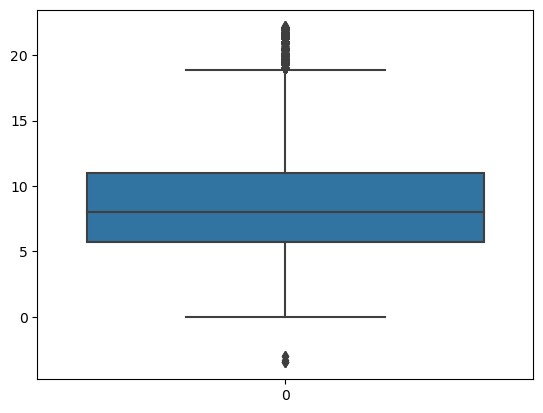

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(new_df['fare_amount'])

In [9]:
# Replace the original dataframe with the cleaned one
df = new_df.copy()
new_df.loc[(new_df['fare_amount'] > upper_limit), 'fare_amount'] = upper_limit
new_df.loc[(new_df['fare_amount'] < lower_limit), 'fare_amount'] = lower_limit
new_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_name,day_of_week,hour,minute,second
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,Thursday,19,19,52,6
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,Friday,29,20,4,56
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,Monday,35,21,45,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,Friday,26,8,22,21
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,Thursday,35,17,47,0


<Axes: >

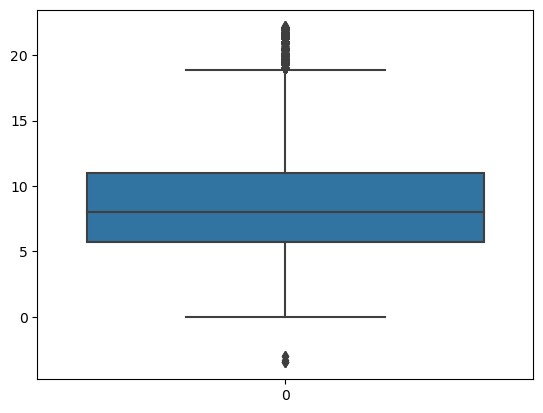

In [10]:
sns.boxplot(new_df['fare_amount'])

In [11]:
# Calculate outliers for passenger_count
Q1 = df['passenger_count'].quantile(0.25)
Q3 = df['passenger_count'].quantile(0.75)
IQR = Q3 - Q1
IQR
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
new_df = df.loc[(df['passenger_count'] < upper_limit) & (df['passenger_count'] > lower_limit)]
print('before removing outlier:', len(df))
print('after removing outlier:', len(new_df))
print('outliers:', len(df) - len(new_df))

before removing outlier: 182833
after removing outlier: 162278
outliers: 20555


<Axes: >

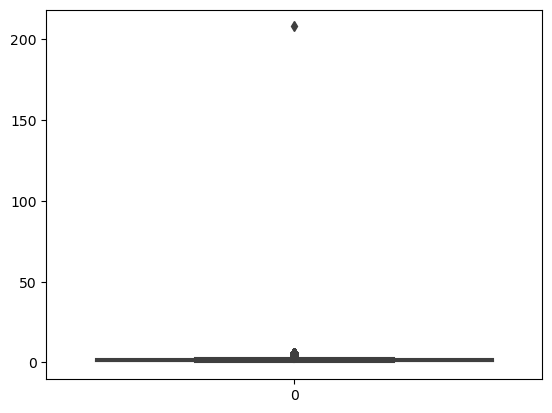

In [12]:
sns.boxplot(df['passenger_count'])

In [13]:
# Replace the original dataframe with the cleaned one
df = new_df.copy()

<Axes: >

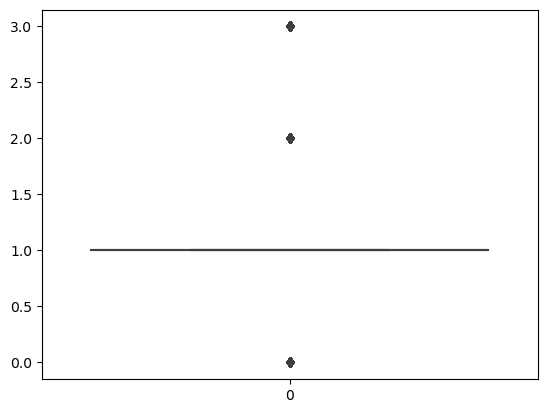

In [14]:
new_df.loc[(new_df['passenger_count'] > upper_limit), 'passenger_count'] = upper_limit
new_df.loc[(new_df['passenger_count'] < lower_limit), 'passenger_count'] = lower_limit
sns.boxplot(new_df['passenger_count'])

In [15]:
# Define car_type function
def car_type(value):
    if value > 0 and value < 3:
        return 'mini'
    if value > 2 and value < 5:
        return 'xuv'
    if value >= 5:
        return 'premium'

df['car_type'] = df['passenger_count'].map(car_type)

In [16]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_name,day_of_week,hour,minute,second,car_type
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,Thursday,19,19,52,6,mini
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,Friday,29,20,4,56,mini
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,Monday,35,21,45,0,mini
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,Friday,26,8,22,21,xuv
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1,2011,2,12,Saturday,6,2,27,9,mini


In [17]:
import numpy as np
# Haversine formula to calculate the distance
def haversine(pickup_lon, pickup_lat, dropoff_lon, dropoff_lat):
    # Convert latitude and longitude from degrees to radians
    pickup_lon, pickup_lat, dropoff_lon, dropoff_lat = map(np.radians, [pickup_lon, pickup_lat, dropoff_lon, dropoff_lat])

    # Haversine formula
    dlat = dropoff_lat - pickup_lat
    dlon = dropoff_lon - pickup_lon
    a = np.sin(dlat / 2) ** 2 + np.cos(pickup_lat) * np.cos(dropoff_lat) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))

    # Radius of Earth in kilometers. Use 3956 for miles
    r = 6371

    return c * r

In [18]:
import numpy as np
# Apply the Haversine formula to the DataFrame
df['distance_km'] = df.apply(lambda row: haversine(row['pickup_longitude'], row['pickup_latitude'], row['dropoff_longitude'], row['dropoff_latitude']), axis=1)


In [19]:
# Find unique values in the distance_km column
unique_values = df['distance_km'].unique()
print("Unique values in 'distance_km':", unique_values)

Unique values in 'distance_km': [1.68332275 2.45758988 5.03637719 ... 1.87505017 3.53971545 5.41778348]


In [20]:
# Count the number of unique values
unique_count = len(unique_values)
print("Number of unique values in 'distance_km':", unique_count)

Number of unique values in 'distance_km': 157741


In [21]:
# Identify and count the number of zeros in the distance_km column
zero_count = (df['distance_km'] == 0).sum()
print("Number of zeros in 'distance_km':", zero_count)

Number of zeros in 'distance_km': 4535


In [22]:
# Calculate the median of the distance_km column
median_distance = df['distance_km'].median()

# Replace zeros in distance_km with the median value
df['distance_km'] = df['distance_km'].replace(0, median_distance)

print("Number of zeros after imputation:", (df['distance_km'] == 0).sum())


Number of zeros after imputation: 0


In [23]:
df = df.drop(df[df['pickup_latitude']>90].index)
df = df.drop(df[df['pickup_latitude']<-90].index)
df = df.drop(df[df['dropoff_latitude']>90].index)
df = df.drop(df[df['dropoff_latitude']<-90].index)
df = df.drop(df[df['pickup_longitude']>180].index)
df = df.drop(df[df['pickup_longitude']<-180].index)
df = df.drop(df[df['dropoff_longitude']>180].index)
df = df.drop(df[df['dropoff_longitude']<-180].index)
print(len(df))
print(df.shape)

162269
(162269, 16)


In [24]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding for car_type
car_types = df[['car_type']]
encoder = OneHotEncoder(sparse_output=False)
encoded_labels = encoder.fit_transform(car_types)

In [25]:
# Convert encoded_labels to DataFrame
encoded_labels_df = pd.DataFrame(encoded_labels, columns=encoder.get_feature_names_out(['car_type']))

In [26]:
# Concatenate with original DataFrame
df = pd.concat([df, encoded_labels_df], axis=1)
df.drop(columns=['car_type'], inplace=True)

In [27]:
days = df[['day_of_name']]
encoder = OneHotEncoder(sparse_output=False)
days_name_labels = encoder.fit_transform(days)

In [28]:
# Convert encoded_labels to DataFrame
days_labels_df = pd.DataFrame(days_name_labels, columns=encoder.get_feature_names_out(['day_of_name']))



In [29]:
# Concatenate with original DataFrame
df = pd.concat([df, days_labels_df], axis=1)
df.drop(columns=['day_of_name'], inplace=True)

In [30]:
! pip install mysql-connector-python
! pip install SQLAlchemy


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [31]:
import mysql.connector
from sqlalchemy import create_engine


# Database connection details
host = "localhost"
username = "root"
password = "root"
database = "uber"
port = 3306  # Default MySQL port

# Connect to the MySQL server (not to a specific database)
conn = mysql.connector.connect(
    host=host,
    user=username,  # use 'user' instead of 'username'
    password=password,
    database=database,
    port=port,
    auth_plugin='mysql_native_password'
)

# Create the connection string (URL format) -> mysql
engine_string = f"mysql+pymysql://{username}:{password}@{host}:{port}/{database}"

# Create the SQLAlchemy engine
engine = create_engine(engine_string)

# Table name where you want to push the data
table_name = "new_table"

# Push the DataFrame to the PostgreSQL table
df.to_sql(table_name, engine,if_exists='replace', index=False)  #['fail', 'replace', 'append']

print("Data successfully pushed to PostgreSQL table!")


Data successfully pushed to PostgreSQL table!


In [32]:
# Retrieve the data from the MySQL table into a DataFrame
df_retrieved = pd.read_sql(f"SELECT * FROM {table_name}", con=engine)
print(df_retrieved.head())

   fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          7.5        -73.999817        40.738354         -73.999512   
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4          4.9        -73.969019        40.755910         -73.969019   

   dropoff_latitude  passenger_count    year  month   day  day_of_week  ...  \
0         40.723217              1.0  2015.0    5.0   7.0         19.0  ...   
1         40.750325              1.0  2009.0    7.0  17.0         29.0  ...   
2         40.772647              1.0  2009.0    8.0  24.0         35.0  ...   
3         40.803349              3.0  2009.0    6.0  26.0         26.0  ...   
4         40.755910              1.0  2011.0    2.0  12.0          6.0  ...   

   car_type_xuv  car_type_None  day_of_name_Friday  day_of_name_Monday  \
0           0.0   

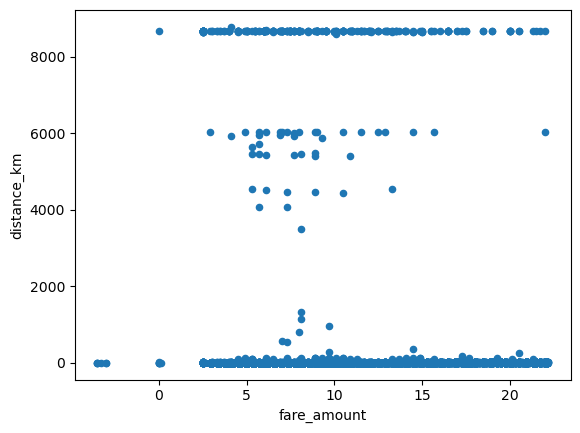

In [33]:
# Scatter plot
df.plot.scatter(x='fare_amount', y='distance_km')
plt.show()

In [34]:
# Drop non-numeric columns for heatmap
df_numeric = df.select_dtypes(include=[np.number])

In [35]:
# Set the figure size
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

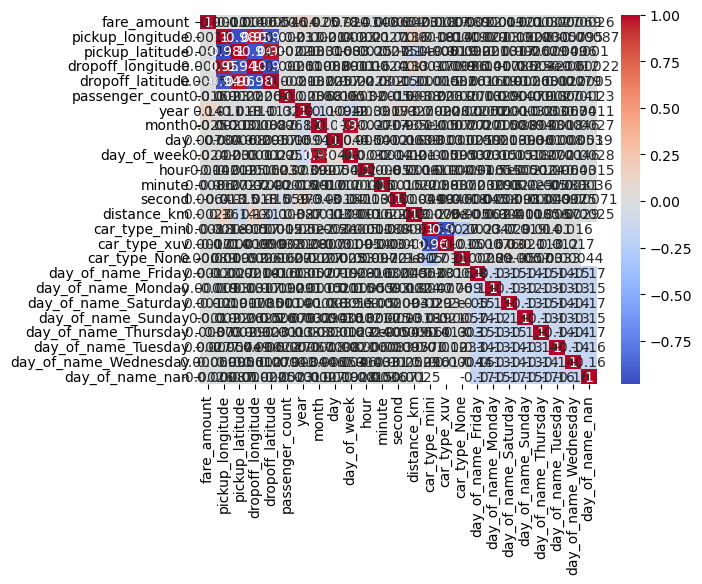

In [36]:
# Generate the heatmap
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming 'df' is your DataFrame and 'fare_amount' is the target variable

# Check for missing values in the entire DataFrame
print("Missing values in DataFrame:")
print(df.isna().sum())

# Handle missing values in the DataFrame
# Option 1: Fill missing values with median (you can also use mean or drop them)
df = df.fillna(df.median())

# Split data into features and target
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training with Decision Tree Regressor
model = DecisionTreeRegressor(max_depth=5, random_state=42)  # Restricting the depth of the tree
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_scaled)

# Evaluate the model’s performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Missing values in DataFrame:
fare_amount              36333
pickup_longitude         36333
pickup_latitude          36333
dropoff_longitude        36333
dropoff_latitude         36333
passenger_count          36333
year                     36333
month                    36333
day                      36333
day_of_week              36333
hour                     36333
minute                   36333
second                   36333
distance_km              36333
car_type_mini            36333
car_type_xuv             36333
car_type_None            36333
day_of_name_Friday        5771
day_of_name_Monday        5771
day_of_name_Saturday      5771
day_of_name_Sunday        5771
day_of_name_Thursday      5771
day_of_name_Tuesday       5771
day_of_name_Wednesday     5771
day_of_name_nan           5771
dtype: int64
Mean Absolute Error: 1.3120758238179613
Mean Squared Error: 4.255134186107441
R-squared: 0.7006816967554611


In [38]:
df.head()



,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,day_of_week,...,car_type_xuv,car_type_None,day_of_name_Friday,day_of_name_Monday,day_of_name_Saturday,day_of_name_Sunday,day_of_name_Thursday,day_of_name_Tuesday,day_of_name_Wednesday,day_of_name_nan
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,2015.0,5.0,7.0,19,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,2009.0,7.0,17.0,29,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,2009.0,8.0,24.0,35,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,2009.0,6.0,26.0,26,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.9,-73.969019,40.755910,-73.969019,40.755910,1.0,2011.0,2.0,12.0,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day', 'day_of_week', 'hour', 'minute', 'second',
       'distance_km', 'car_type_mini', 'car_type_xuv', 'car_type_None',
       'day_of_name_Friday', 'day_of_name_Monday', 'day_of_name_Saturday',
       'day_of_name_Sunday', 'day_of_name_Thursday', 'day_of_name_Tuesday',
       'day_of_name_Wednesday', 'day_of_name_nan'],
      dtype='object')

In [40]:
import pickle

with open('D:/uber/pythonProject5/venv_name/Scripts/data.pkl', 'wb') as file:
    pickle.dump(model, file)

In [41]:
# Load the model from the pickle file
with open('D:/uber/pythonProject5/venv_name/Scripts/data.pkl', 'rb') as file:
    loaded_model = pickle.load(file)




In [ ]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)